# Fantasy Premier League 2022/2023 Season Analysis

**This notebook covers accessing the Fantasy Premier League API, building a dataframe, and analyzing the data using Jupyter, Python, Pandas, and Matplotlib.**

**About the game:** Each FPL manager receives a starting budget of £100 million and must select a total of 15 players: two goalkeepers, five defenders, five midfielders, and three forwards. The selection is limited to a maximum of three players from each Premier League team. Players in the team accumulate points based on real-life performances, with the primary contributors being goals, assists, and clean sheets.

**Analysis Scope:** This notebook employs data encompassing the complete season totals by the conclusion of Gameweek 38 of the 2022/2023 season. The analysis is more of a season overview rather than a week-to-week breakdown; hence, form and fixtures have not been taken into account. The prices utilized are sourced from the FPL API and have already been updated to reflect the 2022/2023 prices. To enhance accuracy, I've established a 'price range' category, given that price fluctuations usually occur within specific ranges.

## 3. Exploratory Data Analysis

The objective of this exploratory data analysis is to uncover insights into the factors contributing to elevated points totals. The FPL API furnishes identical statistics as those accessible on the transfer page. To facilitate my analysis during the preprocessing phase, I have introduced supplementary attributes.

Our focus will exclusively be on cumulative season statistics from the 2022/2023 season.

What aspects are we keen on exploring?
- High performing teams
- High performing players
- Best positions to invest in
- Good value players and differentials

Both offensive and defensive attributes will be considered while evaluating the aforementioned criteria.

The assessment of high performance will primarily involve metrics such as points per game, total points, value for the season, goals scored, assists, clean sheets, saves, bonus points, and the combined tally of goals and assists (G+A). The significance of distinct statistics varies depending on the player's position, and this distinction will be acknowledged.

**LET'S GO DIGGING!**

### NOTE: This analysis will only consider players who played more than 40% of their clubs' total possible minutes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [2]:
#Load data
df = pd.read_csv('data/22_23_season_data/fpl_clean.csv')

In [3]:
#Consider only players who have played atleast 40% of total possible minutes

filt = (df['minutes'] > df['minutes'].max() * 0.4)
slim_df = df.loc[filt]

In [4]:
slim_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
clean_sheets_per_90,252.0,0.287460,0.104252,0.05,0.2275,0.290,0.3500,0.70
expected_assists_per_90,252.0,0.081230,0.072505,0.00,0.0300,0.060,0.1100,0.51
expected_assists,252.0,2.122024,2.106517,0.00,0.6775,1.505,2.9025,13.69
goals_scored,252.0,3.301587,4.760009,0.00,0.0000,1.000,5.0000,36.00
value_form,252.0,0.427381,0.322472,0.00,0.2000,0.400,0.6000,1.70
value_season,252.0,18.200397,6.200922,5.60,13.3000,17.600,22.6250,34.60
bonus,252.0,8.166667,7.209721,0.00,3.0000,6.000,11.2500,48.00
expected_goals_conceded,252.0,36.242222,11.036755,13.56,27.7725,34.990,43.5075,67.45
expected_goals_conceded_per_90,252.0,1.409484,0.275993,0.63,1.2575,1.375,1.6500,2.02
threat,252.0,334.551587,337.323389,0.00,94.5000,231.500,467.5000,1825.00


- Only 252  players played more than 40% of the total season minutes.

###  Analysis By Team:

We begin our analysis with a high-level overview of the teams performances which will provide a good base for determining where to look for players

In [5]:
#Style for plots
plt.style.use('ggplot')

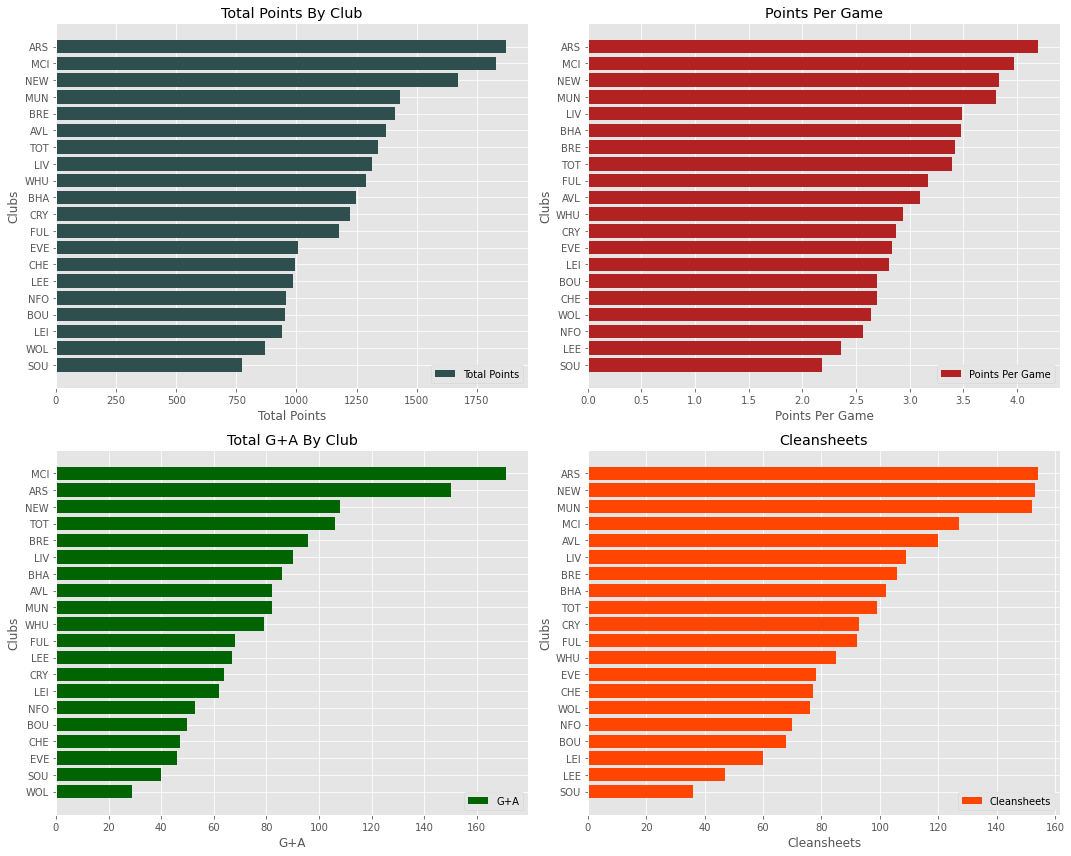

In [9]:
tp_df = slim_df.pivot_table('total_points', index='team', aggfunc='sum').sort_values(by='total_points', ascending=True)
ppg_df = slim_df.pivot_table('points_per_game', index='team', aggfunc='mean').sort_values(by='points_per_game', ascending=True)
att_df = slim_df.pivot_table('G+A', index='team', aggfunc='sum').sort_values(by='G+A', ascending=True)
def_df = slim_df.pivot_table('clean_sheets', index='team', aggfunc='sum').sort_values(by='clean_sheets', ascending=True)

fg, ax = plt.subplots(2, 2, figsize=(15,12))

(ax1, ax2), (ax3, ax4) = ax

#Plot 1
x1 = tp_df.index
y1 = tp_df['total_points']
ax1.barh(x1, y1, label='Total Points', color='#2F4F4F')
ax1.set(title='Total Points By Club', ylabel='Clubs', xlabel='Total Points')
ax1.legend()

#Plot 2
x2 = ppg_df.index
y2 = ppg_df['points_per_game']
ax2.barh(x2, y2, label='Points Per Game', color='#B22222')
ax2.set(title='Points Per Game', ylabel='Clubs', xlabel='Points Per Game')
ax2.legend()

#Plot 3
x3 = att_df.index
y3 = att_df['G+A']
ax3.barh(x3, y3, label='G+A', color='#006400')
ax3.set(title='Total G+A By Club', ylabel='Clubs', xlabel='G+A')
ax3.legend()

#Plot 4
x4 = def_df.index
y4 = def_df['clean_sheets']
ax4.barh(x4, y4, label='Cleansheets', color='#FF4500')
ax4.set(title='Cleansheets', ylabel='Clubs', xlabel='Cleansheets')
ax4.legend()

plt.tight_layout()
plt.savefig('images/teams-performance.png')

The bar charts provide valuable insights into the teams that excelled during the 2022/2023 season. A team that demonstrates high performance is likely to consist of exceptional players who contribute both offensively and defensively, which forms the foundation for player selection. Such teams typically serve as the primary source for acquiring long-term and premium players.

- **Total Points**: Arsenal, Manchester City, and Newcastle emerged as the most remarkable performers in this aspect.
- The average Points Per Game (PPG) for the Arsenal squad exceeded **4 points per game**.
- **Attack**: Manchester City and Arsenal stood out as the strongest attacking teams.
- **Defense**: Arsenal, Manchester United, and Newcastle demonstrated the most robust defensive capabilities.

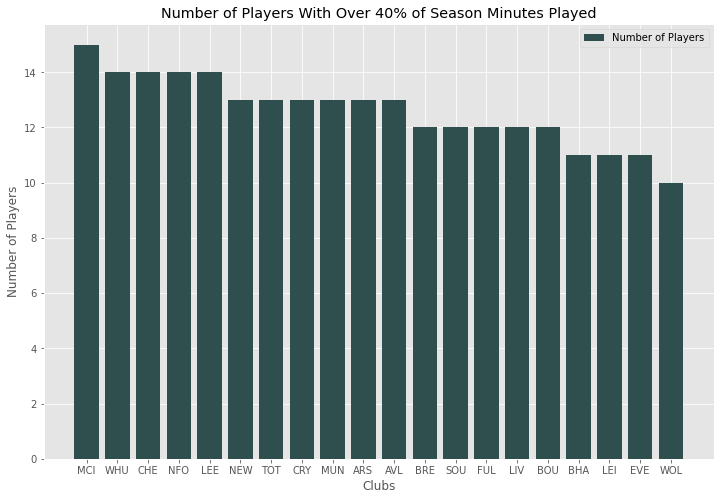

In [14]:
rotation_df = slim_df['team'].value_counts().to_frame()

fg, ax = plt.subplots(figsize=(12,8))

#Plot 
x = rotation_df.index
y = rotation_df['team']
ax.bar(x, y, label='Number of Players', color='#2F4F4F')
ax.set(title='Number of Players With Over 40% of Season Minutes Played', xlabel='Clubs', ylabel='Number of Players')
ax.legend()

To maximize  on potential points, it is always good to choose players that are most likely to start and finish the game. The less players used by a club, the better; as this means that the potential for rotation is very low. 

- Man City was one of the high performing teams with high rotation meanwhile Arsenal did not rotate as often. This might have been a factor in the tail-end of the season when City came from behind to win the league

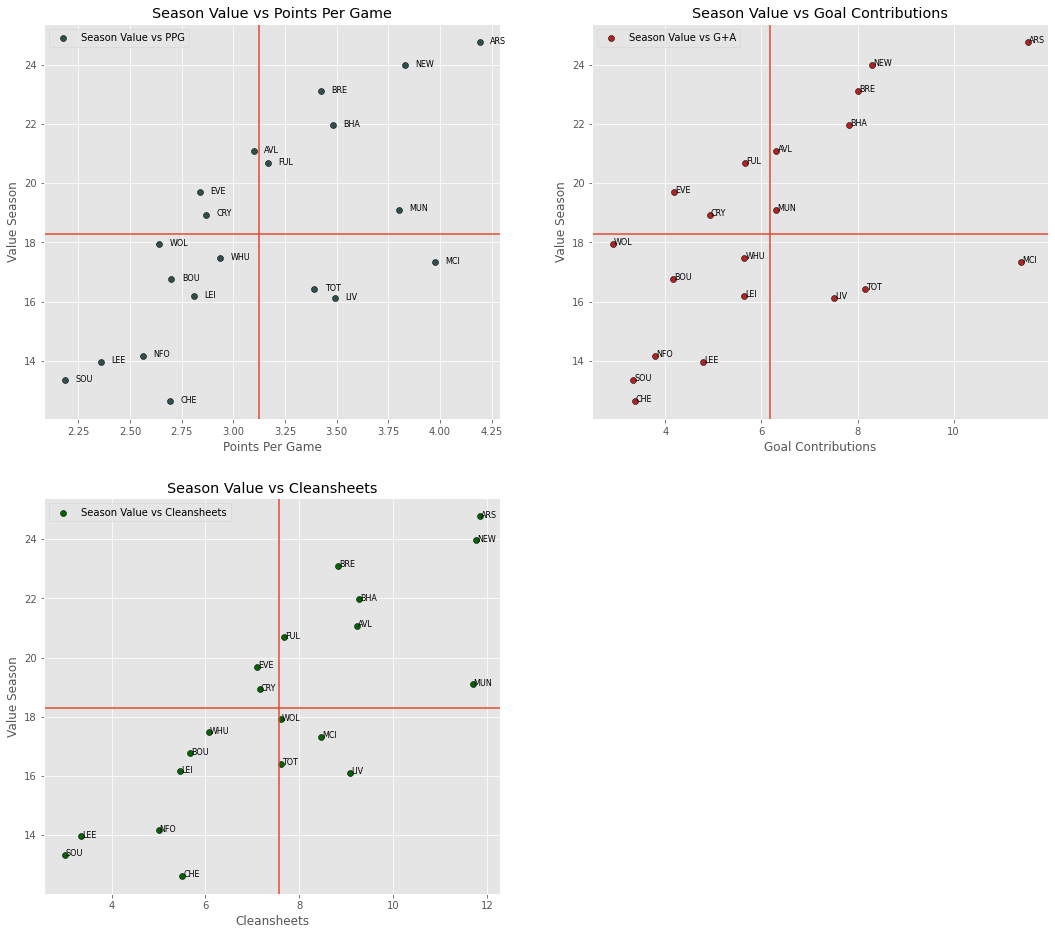

In [11]:
value_df = slim_df.groupby(['team']).aggregate({'value_season': 'mean', 'points_per_game': 'mean'}).sort_values(by='value_season', ascending=False)
def_val_df = slim_df.groupby(['team']).aggregate({'value_season': 'mean', 'clean_sheets': 'mean'}).sort_values(by='value_season', ascending=False)
att_val_df = slim_df.groupby(['team']).aggregate({'value_season': 'mean', 'G+A': 'mean'}).sort_values(by='value_season', ascending=False)

fg, ax = plt.subplots(2,2, figsize=(18,16))

(ax1, ax2), (ax3, ax4) = ax
ax[-1, -1].axis('off')

#Plot 1
x1 = value_df['points_per_game']
y1 = value_df['value_season']
ax1.scatter(x1, y1, label='Season Value vs PPG', edgecolor='black', color='#2F4F4F')
ax1.set(title='Season Value vs Points Per Game', xlabel='Points Per Game', ylabel='Value Season')
ax1.legend()

ann_txt1 = value_df.index
for i, txt1 in enumerate(ann_txt1):
    ax1.annotate(txt1, (x1[i]+.05, y1[i]-.05), fontsize=8)
    

y1_mean = y1.mean()
x1_mean = x1.mean()
ax1.axhline(y1_mean)
ax1.axvline(x1_mean)
    
#Plot 2
x2 = att_val_df['G+A']
y2 = value_df['value_season']
ax2.scatter(x2, y2, label='Season Value vs G+A', edgecolor='black', color='#B22222')
ax2.set(title='Season Value vs Goal Contributions', xlabel='Goal Contributions', ylabel='Value Season')
ax2.legend()

ann_txt2 = att_val_df.index
for i, txt2 in enumerate(ann_txt2):
    ax2.annotate(txt2, (x2[i]+.025, y2[i]-.025), fontsize=8)

y2_mean = y2.mean()
x2_mean = x2.mean()
ax2.axhline(y2_mean)
ax2.axvline(x2_mean)

#Plot 3
x3 = def_val_df['clean_sheets']
y3 = def_val_df['value_season']
ax3.scatter(x3, y3, label='Season Value vs Cleansheets', edgecolor='black', color='#006400')
ax3.set(title='Season Value vs Cleansheets', xlabel='Cleansheets', ylabel='Value Season')
ax3.legend()

y3_mean = y3.mean()
x3_mean = x3.mean()
ax3.axhline(y3_mean)
ax3.axvline(x3_mean)

ann_txt3 = def_val_df.index
for i, txt3 in enumerate(ann_txt3):
    ax3.annotate(txt3, (x3[i]+.025, y3[i]-.05), fontsize=8)
    
plt.savefig('images/teams-value')

The aforementioned scatter plots can prove valuable for identifying teams with potentially high-value and high-performing players. "High value" denotes obtaining a favorable return on investment or a high points per million ratio. Players from these teams likely served as differentials, complementing your premium players.

The upper right quadrant in each scatter plot encompasses the teams excelling in both value and performance across statistical categories. These teams are our preferred sources for constructing the foundational squad, comprising long-term and premium players. Teams such as Man City, Arsenal, Man Utd, and Newcastle have already been recognized as meeting these criteria, hence they will not be considered in this section.

- **Overall**: Brighton, Brentford, and Fulham emerged as viable sources for differentials in the past season.
- **Goal Contributions**: Aston Villa, Brighton, and Brentford stood out as teams offering players with potential for attacking returns.
- **Clean Sheets**: Aston Villa, Brighton, Brentford, and Fulham were notable teams for sourcing players capable of defensive returns.

### Analysis By Position:

Moving forward in our analysis, we delve into the positions that warrant the lion's share of our investment, determined by their performance. This exploration will serve as a compass for structuring our squad and distributing financial resources effectively.

Continuing with our "**slim_df**" (comprising players with at least 40% of the total season minutes), as these players carry substantial statistical significance. Within this dataframe, we will refine our focus to encompass players who rank within the top 50% across several key statistical categories: Total points, Points per game, Bonus, and Value Season. This filtration will be performed on a per-position basis, ensuring an equitable comparison.

This subset of players, which we shall term "**high-performing players**," forms the basis of our analysis.

In [13]:
#Get above average players in each position

def get_top_50_pct(data_f, pos_list,):
    players = []
    for pos in pos_list:
        pos_df = data_f[data_f['position'] == pos]
        
        mean_vals = dict(pos_df.describe().loc['50%'][['total_points', 'points_per_game','value_season', 'bonus']])
        
        filt1 = pos_df['total_points'] > mean_vals['total_points']
        filt2 = pos_df['points_per_game'] > mean_vals['points_per_game']
        filt3 = pos_df['value_season'] > mean_vals['value_season']
        filt4 = pos_df['bonus'] > mean_vals['bonus']
        
        above_mean = list(pos_df[filt1 & filt2 & filt3 & filt4]['web_name'])
        
        for player in above_mean:
            players.append(player)
    return players

positions = ['GKP', 'DEF', 'MID', 'FWD']
above_ave_players = get_top_50_pct(slim_df, positions)

top_df = slim_df.set_index('web_name').loc[above_ave_players].reset_index()

In [14]:
top_df.head()

,web_name,position,team,clean_sheets_per_90,expected_assists_per_90,expected_assists,goals_scored,value_form,value_season,bonus,...,total_points,expected_goals_per_90,bps,goals_conceded_per_90,selected_by_percent,clean_sheets,price,G+A,price_range,ownership
0,Martínez,GKP,AVL,0.32,0.01,0.21,0,0.5,27.0,15,...,135,0.00,678,1.09,6.6,11,5.0,0,Mid,Differential
1,Martínez,DEF,MUN,0.38,0.04,1.02,1,0.0,18.4,6,...,81,0.02,481,1.41,4.7,9,4.4,1,Budget,Differential
2,Raya,GKP,BRE,0.32,0.00,0.12,0,1.0,34.6,20,...,166,0.00,822,1.21,14.4,12,4.8,0,Budget,Differential
3,Leno,GKP,FUL,0.22,0.00,0.00,0,1.0,30.9,17,...,142,0.00,766,1.42,3.5,8,4.6,0,Budget,Differential
4,Alisson,GKP,LIV,0.38,0.00,0.02,0,0.9,29.5,15,...,162,0.00,824,1.16,16.8,14,5.5,1,Mid,High


In [15]:
#Position value counts
top_df['position'].value_counts()

MID    33
DEF    31
GKP     7
FWD     6
Name: position, dtype: int64

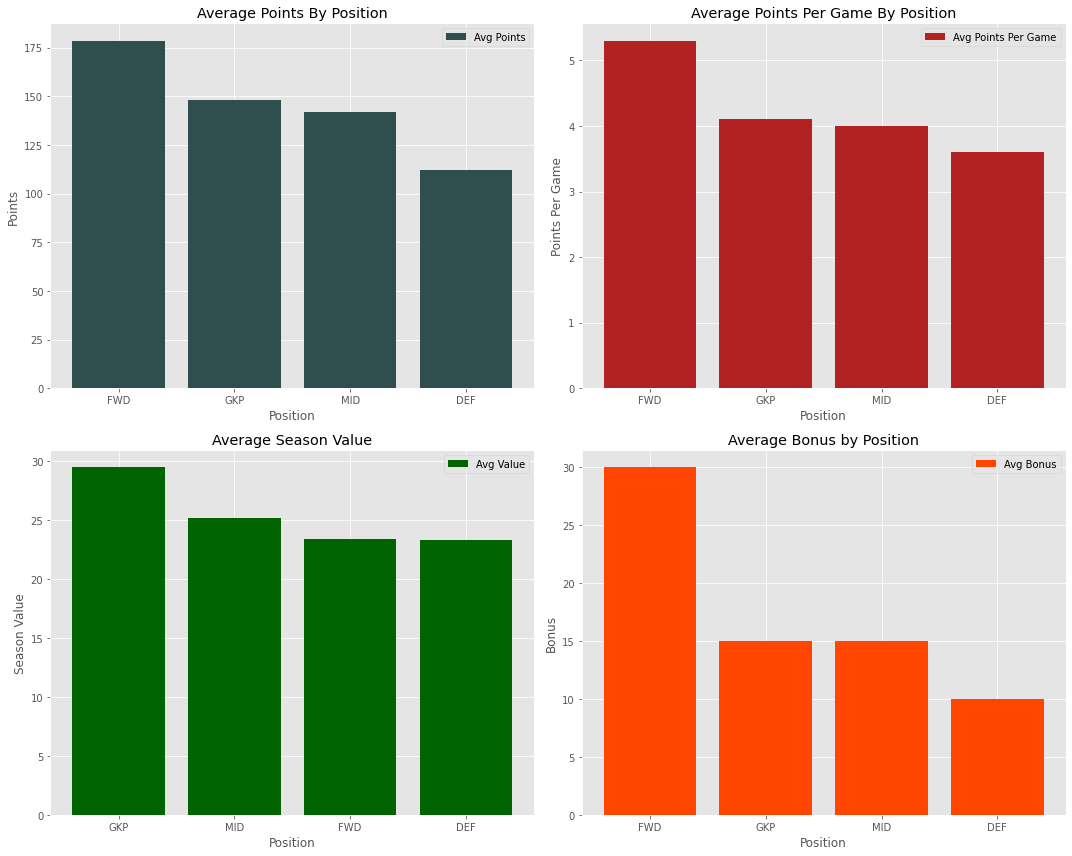

In [16]:
tp_df = top_df.pivot_table('total_points', index='position', aggfunc='median').sort_values(by='total_points', ascending=False)
ppg_df = top_df.pivot_table('points_per_game', index='position', aggfunc='median').sort_values(by='points_per_game', ascending=False)
val_df = top_df.pivot_table('value_season', index='position', aggfunc='median').sort_values(by='value_season', ascending=False)
bonus_df = top_df.pivot_table('bonus', index='position', aggfunc='median').sort_values(by='bonus', ascending=False)

fg, ax = plt.subplots(2, 2, figsize=(15,12))

(ax1, ax2), (ax3, ax4) = ax

#Plot 1
x1 = tp_df.index
y1 = tp_df['total_points']
ax1.bar(x1, y1, label='Avg Points', color='#2F4F4F')
ax1.set(title='Average Points By Position', xlabel='Position', ylabel='Points')
ax1.legend()

#Plot 2
x2 = ppg_df.index
y2 = ppg_df['points_per_game']
ax2.bar(x2, y2, label='Avg Points Per Game', color='#B22222')
ax2.set(title='Average Points Per Game By Position', xlabel='Position', ylabel='Points Per Game')
ax2.legend()

#Plot 3
x3 = val_df.index
y3 = val_df['value_season']
ax3.bar(x3, y3, label='Avg Value', color='#006400')
ax3.set(title='Average Season Value', xlabel='Position', ylabel='Season Value')
ax3.legend()

#Plot 4
x4 = bonus_df.index
y4 = bonus_df['bonus']
ax4.bar(x4, y4, label='Avg Bonus', color='#FF4500')
ax4.set(title='Average Bonus by Position', xlabel='Position', ylabel='Bonus')
ax4.legend()

plt.tight_layout()

- Speaking in terms of points per game, on average, Forwards yielded the most favorable returns.
- Throughout the previous season, Goalkeepers and Midfielders offered exceptional value, predominantly attributed to the impressive performances of mid-priced players.
- The FPL bonus points system typically favors rewarding attacking actions over defensive ones. This confers an advantage upon Forwards, Midfielders, and Defenders with an inclination towards an attacking. On average, Forwards secured at least 15 more bonus points than counterparts in other positions.

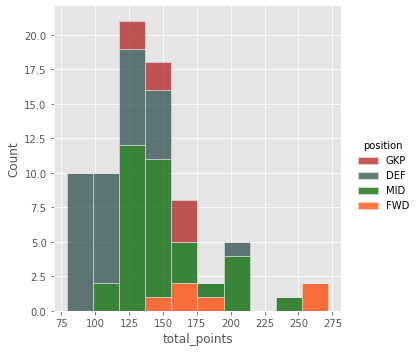

In [18]:
#Distribution of points by position
cp = sns.color_palette(['#B22222','#2F4F4F','#006400','#FF4500'])
#cp = sns.color_palette(['#B22222','#2F4F4F','#006400'])
sns.displot(top_df, x='total_points', hue='position', multiple='stack', stat='count', bins=10, palette=cp)

plt.savefig('images/positions-performances.png')

- Notably, the positions with a significant concentration of high-performing players were the Midfield and Forward positions.
- Among these, Midfielders boasted the highest number of players achieving the 200-point mark, closely followed by Forwards. Allocating substantial resources to these positions would likely have resulted in substantial returns over the course of the season. These positions would have proven highly suitable for long-term investment strategies.

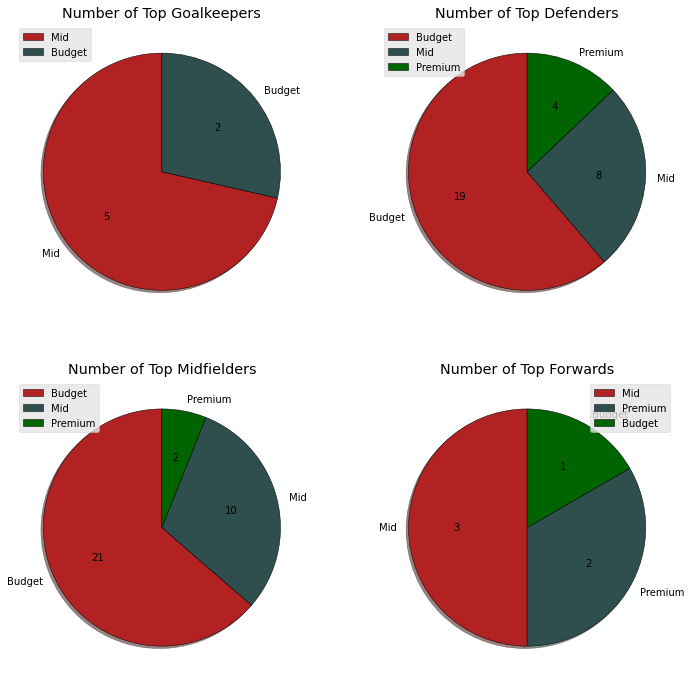

In [25]:
fig, ax = plt.subplots(2,2,figsize=(12,12))
(ax1,ax2),(ax3,ax4) = ax

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        #return '{p:.2f}% ({v:})'.format(v=val)
        return '{v:}'.format(v=val)
    return my_autopct
        
colors=['#B22222','#2F4F4F','#006400']
#Plot1
slices1 = top_df.groupby('position')['price_range'].value_counts()['GKP']
labels1 = top_df.groupby('position')['price_range'].value_counts()['GKP'].index
ax1.pie(slices1, labels=labels1, wedgeprops={'edgecolor':'black'}, colors=colors, startangle=90, autopct=make_autopct(slices1), shadow=True)
ax1.set(title='Number of Top Goalkeepers')
ax1.legend()

#Plot2
slices2 = top_df.groupby('position')['price_range'].value_counts()['DEF']
labels2 = top_df.groupby('position')['price_range'].value_counts()['DEF'].index
ax2.pie(slices2, labels=labels2, wedgeprops={'edgecolor':'black'}, colors=colors, startangle=90, autopct=make_autopct(slices2), shadow=True)
ax2.set(title='Number of Top Defenders')
ax2.legend()

#PLot3
slices3 = top_df.groupby('position')['price_range'].value_counts()['MID']
labels3 = top_df.groupby('position')['price_range'].value_counts()['MID'].index
ax3.pie(slices3, labels=labels3, wedgeprops={'edgecolor':'black'}, colors=colors, startangle=90, autopct=make_autopct(slices3), shadow=True)
ax3.set(title='Number of Top Midfielders')
ax3.legend()

#Plot4
slices4 = top_df.groupby('position')['price_range'].value_counts()['FWD']
labels4 = top_df.groupby('position')['price_range'].value_counts()['FWD'].index
ax4.pie(slices4, labels=labels4, wedgeprops={'edgecolor':'black'}, colors=colors, startangle=90, autopct=make_autopct(slices4), shadow=True)
ax4.set(title='Number of Top Forwards')
ax4.legend()

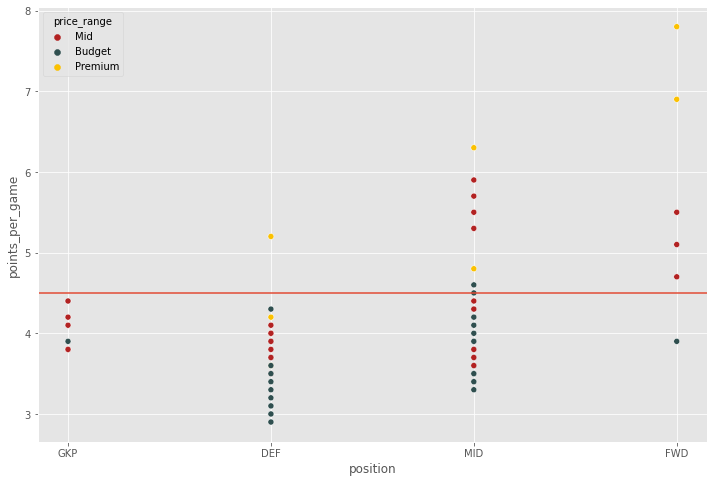

In [26]:
fg, ax = plt.subplots(figsize=(12,8))

#cp = sns.color_palette(['#B22222','#2F4F4F','#006400','#FF4500'])
cp = sns.color_palette(['#B22222','#2F4F4F','#FBC101'])
ax = sns.scatterplot(data=top_df, y='points_per_game', x='position', hue='price_range', palette=cp)
ax.axhline(4.5)


When constructing their squad in Fantasy Premier League, a manager must allocate their budget across premium players, mid-priced players, and budget players. The composition of the squad significantly impacts the points accumulated over the season. A well-structured team consistently outshines a top-heavy team brimming with budget fillers.

The graph above delves into the configuration of high-performing players across each position. This insight proves invaluable in shaping the squad and having an influence over the chosen formation.

- Midfielders and Forwards is where you would have wanted to spend the most money on premium players followed by atleast one premium Defender.

### Analysis By Player:

Now that we have a rough idea of where to look (club and position) for the high performing players, we can start analyzing the players to see what insights we can get from the data.

<AxesSubplot:>

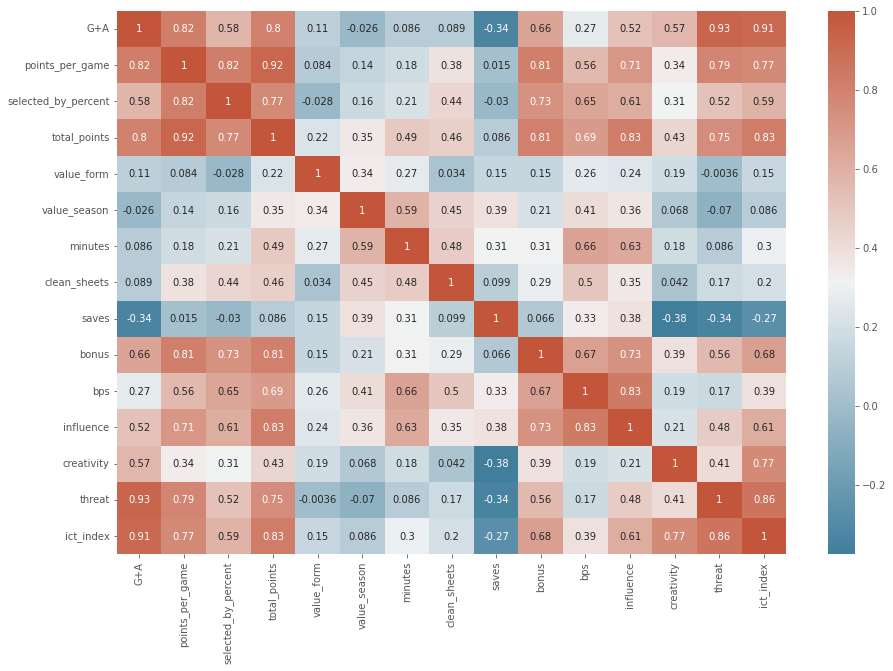

In [28]:
#Correlation between different variables
corr_df = top_df[['G+A', 'points_per_game',
       'selected_by_percent', 'total_points', 'value_form', 'value_season',
       'minutes', 'clean_sheets',
      'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index'
       ]].corr()

f, ax = plt.subplots(figsize=(15,10))
#Configure custom diverging colormap
cmap = sns.diverging_palette(230,20, as_cmap=True)
#Draw map
sns.heatmap(corr_df, annot=True, cmap=cmap)

Here we are interested in the attributes that have dark shades of red or blue in the **total points** row as these have moderate to strong positive/negative correlation. We will only choose the top 4 attributes to plot against the total points attributes.

- Points Per Game
- Threat
- Bonus
- ICT Index

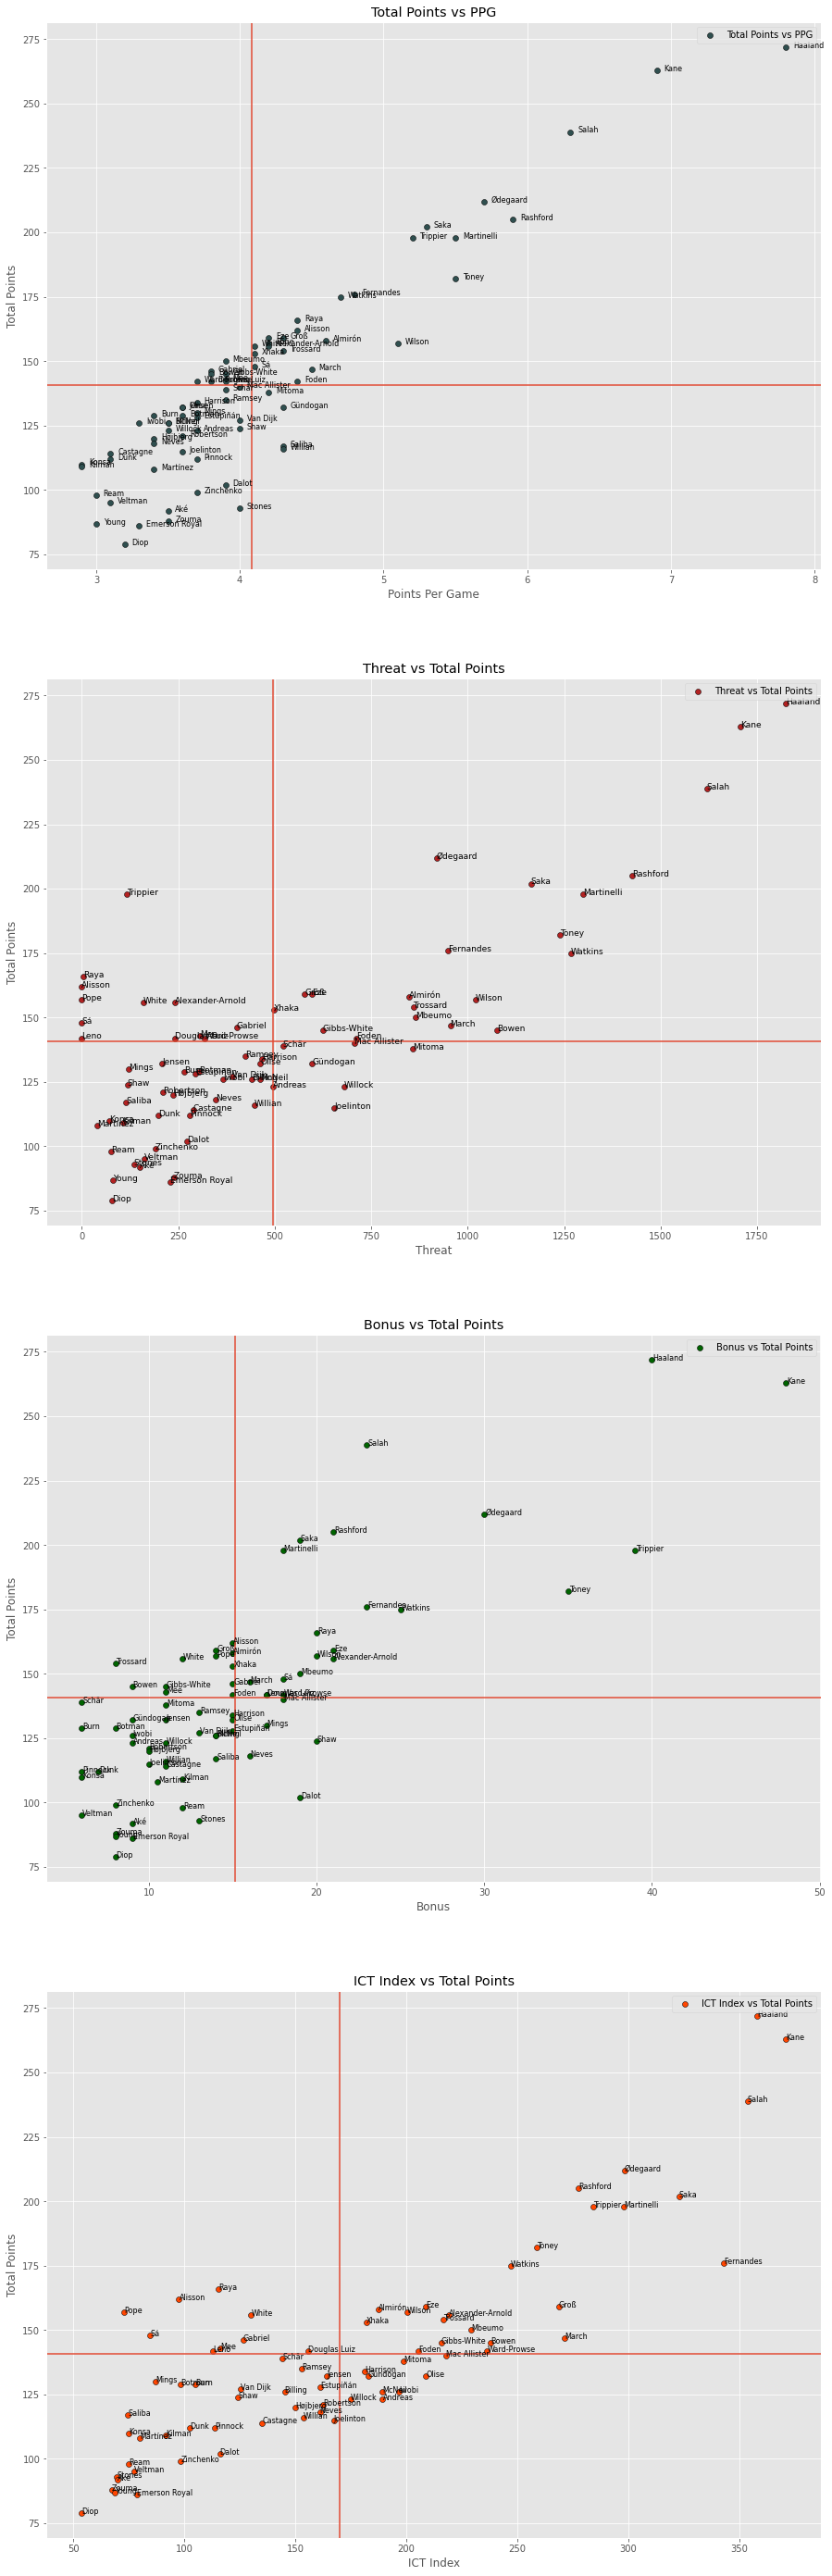

In [19]:
ppg_df = top_df.groupby(['web_name']).aggregate({'total_points': 'mean', 'points_per_game': 'mean'}).sort_values(by='total_points', ascending=False)
inf_df = top_df.groupby(['web_name']).aggregate({'total_points': 'mean', 'threat': 'mean'}).sort_values(by='total_points', ascending=False)
bon_df = top_df.groupby(['web_name']).aggregate({'total_points': 'mean', 'bonus': 'mean'}).sort_values(by='total_points', ascending=False)
ict_df = top_df.groupby(['web_name']).aggregate({'total_points': 'mean', 'ict_index': 'mean'}).sort_values(by='total_points', ascending=False)

fg, ax = plt.subplots(4,1, figsize=(15,50))

ax1, ax2, ax3, ax4 = ax
#ax[-1, -1].axis('off')

#Plot 1
x1 = ppg_df['points_per_game']
y1 = ppg_df['total_points']
ax1.scatter(x1, y1, label='Total Points vs PPG', edgecolor='black', color='#2F4F4F')
ax1.set(title='Total Points vs PPG', xlabel='Points Per Game', ylabel='Total Points')
ax1.legend()

ann_txt1 = ppg_df.index
for i, txt1 in enumerate(ann_txt1):
    ax1.annotate(txt1, (x1[i]+.05, y1[i]-.20), fontsize=8)
    

y1_mean = y1.mean()
x1_mean = x1.mean()
ax1.axhline(y1_mean)
ax1.axvline(x1_mean)
    
#Plot 2
x2 = inf_df['threat']
y2 = inf_df['total_points']
ax2.scatter(x2, y2, label='Threat vs Total Points', edgecolor='black', color='#B22222')
ax2.set(title='Threat vs Total Points', xlabel='Threat', ylabel='Total Points')
ax2.legend()

ann_txt2 = inf_df.index
for i, txt2 in enumerate(ann_txt2):
    ax2.annotate(txt2, (x2[i]+.05, y2[i]-.20), fontsize=9)

y2_mean = y2.mean()
x2_mean = x2.mean()
ax2.axhline(y2_mean)
ax2.axvline(x2_mean)

#Plot 3
x3 = bon_df['bonus']
y3 = bon_df['total_points']
ax3.scatter(x3, y3, label='Bonus vs Total Points', edgecolor='black', color='#006400')
ax3.set(title='Bonus vs Total Points', xlabel='Bonus', ylabel='Total Points')
ax3.legend()

y3_mean = y3.mean()
x3_mean = x3.mean()
ax3.axhline(y3_mean)
ax3.axvline(x3_mean)

ann_txt3 = bon_df.index
for i, txt3 in enumerate(ann_txt3):
    ax3.annotate(txt3, (x3[i]+.05, y3[i]-.20), fontsize=8)

#Plot 4
x4 = ict_df['ict_index']
y4 = ict_df['total_points']
ax4.scatter(x4, y4, label='ICT Index vs Total Points', edgecolor='black', color='#FF4500')
ax4.set(title='ICT Index vs Total Points', xlabel='ICT Index', ylabel='Total Points')
ax4.legend()

y4_mean = y4.mean()
x4_mean = x4.mean()
ax4.axhline(y4_mean)
ax4.axvline(x4_mean)

ann_txt4 = ict_df.index
for i, txt4 in enumerate(ann_txt4):
    ax4.annotate(txt4, (x4[i]+.05, y4[i]-.20), fontsize=8)
    
plt.savefig('images/player-performances.png')

In each of the four plots, we have divided the graphs into four quadrants based on the mean of the x and y values. Here we  are most interested in the players in the the top half of the plots. The top-right quadrants contains the players that our base squad will most likely be made up of while the top-left quadrants contain the players who will make great differentials. This is by no means to say that players in the bottom half of the graphs should not be considered as they are still part of the high performing players dataframe. The plots, however, do act as a guide when making final decisions.

Key takeaways:
- **TP vs PPG**: The upper-right quadrant is dominated by midfielders and forwards which is consistent with our  earlier analysis for high performing positions 
- **TP vs Threat**: Players with high threat are the ones who are most likely to have the greatest attacking threat in their teams. In the upper-right quadrant we find some of the best differentials from otherwise smaller teams such as Watkins(Villa), Gibbs-White(Nottingham) and Wilson(Newcastle).
- **TP vs Bonus**: Bonus points can help to give you the edge in tight gameweeks. Here we see that midfielders and forwards dominate the upper-right quandrant while Trippier and Trent were the only defenders in this quadrant.
- **TP vs ICT Index**: This graph tells us that ICT Index is only useful for assessing forwards, midfielders and attacking defenders as there are no centre-backs in the upper-right quadrant. High performing centre backs are found in the upper-left quadrant.

### Squad Selection:

The final part is the squad selection based on the Points Per Game, Threat, Bonus and Value Season. We will build four different squads of 15 with high ranking players from each category. The maximum number of players per position constraint will be observed, however, the budget and maximum number of players per team will not. 

**Points Per Game Squad**

In [32]:
g = top_df[top_df['position'] == 'GKP'].sort_values(by='points_per_game', ascending=False).head(2)
d = top_df[top_df['position'] == 'DEF'].sort_values(by='points_per_game', ascending=False).head(5)
m = top_df[top_df['position'] == 'MID'].sort_values(by='points_per_game', ascending=False).head(5)
f = top_df[top_df['position'] == 'FWD'].sort_values(by='points_per_game', ascending=False).head(3)

squad1_df = pd.concat([g, d,m,f])
squad1_df

,web_name,position,team,clean_sheets_per_90,expected_assists_per_90,expected_assists,goals_scored,value_form,value_season,bonus,...,total_points,expected_goals_per_90,bps,goals_conceded_per_90,selected_by_percent,clean_sheets,price,G+A,price_range,ownership
2,Raya,GKP,BRE,0.32,0.00,0.12,0,1.0,34.6,20,...,166,0.00,822,1.21,14.4,12,4.8,0,Budget,Differential
4,Alisson,GKP,LIV,0.38,0.00,0.02,0,0.9,29.5,15,...,162,0.00,824,1.16,16.8,14,5.5,1,Mid,High
31,Trippier,DEF,NEW,0.43,0.32,12.03,1,0.6,33.0,39,...,198,0.02,941,0.83,62.4,16,6.0,10,Premium,High
9,Saliba,DEF,ARS,0.45,0.01,0.32,2,0.0,23.9,14,...,117,0.03,571,0.93,15.6,12,4.9,3,Budget,High
24,Alexander-Arnold,DEF,LIV,0.31,0.29,9.26,2,0.8,20.0,21,...,156,0.07,824,1.36,30.7,10,7.8,13,Premium,High
7,White,DEF,ARS,0.44,0.11,3.60,2,0.7,31.2,12,...,156,0.04,734,1.03,16.1,15,5.0,7,Mid,High
27,Shaw,DEF,MUN,0.42,0.10,2.90,1,0.8,23.4,20,...,124,0.04,626,1.23,19.2,12,5.3,5,Mid,High
58,Salah,MID,LIV,0.36,0.19,7.03,19,0.6,18.2,23,...,239,0.57,651,1.23,37.2,13,13.1,32,Premium,High
62,Rashford,MID,MUN,0.41,0.09,2.86,17,0.4,28.5,21,...,205,0.48,530,1.22,37.8,13,7.2,24,Mid,High
39,Ødegaard,MID,ARS,0.37,0.23,8.02,15,0.9,30.7,30,...,212,0.28,813,1.09,33.3,13,6.9,23,Mid,High


**Value Season Squad**

In [33]:
g = top_df[top_df['position'] == 'GKP'].sort_values(by='value_season', ascending=False).head(2)
d = top_df[top_df['position'] == 'DEF'].sort_values(by='value_season', ascending=False).head(5)
m = top_df[top_df['position'] == 'MID'].sort_values(by='value_season', ascending=False).head(5)
f = top_df[top_df['position'] == 'FWD'].sort_values(by='value_season', ascending=False).head(3)

squad2_df = pd.concat([g, d,m,f])
squad2_df

,web_name,position,team,clean_sheets_per_90,expected_assists_per_90,expected_assists,goals_scored,value_form,value_season,bonus,...,total_points,expected_goals_per_90,bps,goals_conceded_per_90,selected_by_percent,clean_sheets,price,G+A,price_range,ownership
2,Raya,GKP,BRE,0.32,0.00,0.12,0,1.0,34.6,20,...,166,0.00,822,1.21,14.4,12,4.8,0,Budget,Differential
3,Leno,GKP,FUL,0.22,0.00,0.00,0,1.0,30.9,17,...,142,0.00,766,1.42,3.5,8,4.6,0,Budget,Differential
31,Trippier,DEF,NEW,0.43,0.32,12.03,1,0.6,33.0,39,...,198,0.02,941,0.83,62.4,16,6.0,10,Premium,High
7,White,DEF,ARS,0.44,0.11,3.60,2,0.7,31.2,12,...,156,0.04,734,1.03,16.1,15,5.0,7,Mid,High
15,Mee,DEF,BRE,0.33,0.02,0.74,3,1.1,29.8,11,...,143,0.09,643,1.10,14.4,12,4.8,5,Budget,Differential
34,Botman,DEF,NEW,0.37,0.03,1.09,0,0.7,28.7,8,...,129,0.08,666,0.86,6.9,13,4.5,2,Budget,Differential
32,Burn,DEF,NEW,0.41,0.04,1.28,1,0.7,28.7,6,...,129,0.06,584,0.87,4.3,14,4.5,1,Budget,Differential
38,Xhaka,MID,ARS,0.39,0.12,3.89,7,1.4,31.9,15,...,153,0.14,634,1.05,2.7,13,4.8,15,Budget,Differential
39,Ødegaard,MID,ARS,0.37,0.23,8.02,15,0.9,30.7,30,...,212,0.28,813,1.09,33.3,13,6.9,23,Mid,High
41,Martinelli,MID,ARS,0.45,0.23,6.98,15,0.2,30.5,18,...,198,0.30,648,1.06,26.3,14,6.5,24,Mid,High


**Threat Squad**

In [38]:
g = top_df[top_df['position'] == 'GKP'].sort_values(by='threat', ascending=False).head(2)
d = top_df[top_df['position'] == 'DEF'].sort_values(by='threat', ascending=False).head(5)
m = top_df[top_df['position'] == 'MID'].sort_values(by='threat', ascending=False).head(5)
f = top_df[top_df['position'] == 'FWD'].sort_values(by='threat', ascending=False).head(3)

squad3_df = pd.concat([g, d,m,f])
squad3_df

,web_name,position,team,clean_sheets_per_90,expected_assists_per_90,expected_assists,goals_scored,value_form,value_season,bonus,...,total_points,expected_goals_per_90,bps,goals_conceded_per_90,selected_by_percent,clean_sheets,price,G+A,price_range,ownership
2,Raya,GKP,BRE,0.32,0.00,0.12,0,1.0,34.6,20,...,166,0.00,822,1.21,14.4,12,4.8,0,Budget,Differential
0,Martínez,GKP,AVL,0.32,0.01,0.21,0,0.5,27.0,15,...,135,0.00,678,1.09,6.6,11,5.0,0,Mid,Differential
33,Schär,DEF,NEW,0.42,0.06,2.05,1,0.3,27.3,6,...,139,0.13,617,0.79,14.4,15,5.1,4,Mid,Differential
8,Gabriel,DEF,ARS,0.37,0.02,0.66,3,0.7,28.1,15,...,146,0.13,723,1.14,13.4,14,5.2,3,Mid,Differential
22,Van Dijk,DEF,LIV,0.35,0.03,1.09,3,0.7,19.2,13,...,127,0.08,636,1.14,12.4,11,6.6,4,Premium,Differential
15,Mee,DEF,BRE,0.33,0.02,0.74,3,1.1,29.8,11,...,143,0.09,643,1.10,14.4,12,4.8,5,Budget,Differential
34,Botman,DEF,NEW,0.37,0.03,1.09,0,0.7,28.7,8,...,129,0.08,666,0.86,6.9,13,4.5,2,Budget,Differential
58,Salah,MID,LIV,0.36,0.19,7.03,19,0.6,18.2,23,...,239,0.57,651,1.23,37.2,13,13.1,32,Premium,High
62,Rashford,MID,MUN,0.41,0.09,2.86,17,0.4,28.5,21,...,205,0.48,530,1.22,37.8,13,7.2,24,Mid,High
41,Martinelli,MID,ARS,0.45,0.23,6.98,15,0.2,30.5,18,...,198,0.30,648,1.06,26.3,14,6.5,24,Mid,High


**Bonus Points Squad**

In [35]:
g = top_df[top_df['position'] == 'GKP'].sort_values(by='bonus', ascending=False).head(2)
d = top_df[top_df['position'] == 'DEF'].sort_values(by='bonus', ascending=False).head(5)
m = top_df[top_df['position'] == 'MID'].sort_values(by='bonus', ascending=False).head(5)
f = top_df[top_df['position'] == 'FWD'].sort_values(by='bonus', ascending=False).head(3)

squad4_df = pd.concat([g, d,m,f])
squad4_df

,web_name,position,team,clean_sheets_per_90,expected_assists_per_90,expected_assists,goals_scored,value_form,value_season,bonus,...,total_points,expected_goals_per_90,bps,goals_conceded_per_90,selected_by_percent,clean_sheets,price,G+A,price_range,ownership
2,Raya,GKP,BRE,0.32,0.00,0.12,0,1.0,34.6,20,...,166,0.00,822,1.21,14.4,12,4.8,0,Budget,Differential
6,Sá,GKP,WOL,0.31,0.00,0.00,0,0.5,29.6,18,...,148,0.00,683,1.53,5.1,11,5.0,0,Mid,Differential
31,Trippier,DEF,NEW,0.43,0.32,12.03,1,0.6,33.0,39,...,198,0.02,941,0.83,62.4,16,6.0,10,Premium,High
24,Alexander-Arnold,DEF,LIV,0.31,0.29,9.26,2,0.8,20.0,21,...,156,0.07,824,1.36,30.7,10,7.8,13,Premium,High
27,Shaw,DEF,MUN,0.42,0.10,2.90,1,0.8,23.4,20,...,124,0.04,626,1.23,19.2,12,5.3,5,Mid,High
28,Dalot,DEF,MUN,0.42,0.06,1.53,1,0.4,21.2,19,...,102,0.10,502,1.42,6.3,10,4.8,3,Budget,Differential
11,Mings,DEF,AVL,0.34,0.03,0.95,1,0.3,27.7,17,...,130,0.03,617,1.14,12.5,12,4.7,4,Budget,Differential
39,Ødegaard,MID,ARS,0.37,0.23,8.02,15,0.9,30.7,30,...,212,0.28,813,1.09,33.3,13,6.9,23,Mid,High
61,Fernandes,MID,MUN,0.49,0.29,10.70,8,0.6,18.5,23,...,176,0.25,748,1.06,13.3,18,9.5,17,Premium,Differential
58,Salah,MID,LIV,0.36,0.19,7.03,19,0.6,18.2,23,...,239,0.57,651,1.23,37.2,13,13.1,32,Premium,High


The four different squads allows us to assess the different options and compare the players using multiple categories to better optimize the final squad.

## Conclusion:

- We identified  Man City, Arsenal, Man Utd and Newcastle as the best performing teams 
- Aston Villa, Brighton, Brentford, and Fulhum were identified as the teams with the best differentials last season.
- High investments in the fowards and midfield positions would have yielded the best returns over the course of last season.
- Haalaand and Kane were by far the best performing players last season.
- Sá, Mee, Gross, Eze, Botman and Watkins were some of the best differential picks of last season.
